#Load data
Load data and remove header line. 

In [70]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sp

data = np.genfromtxt('UnicornRecorder_baseline.csv', delimiter=',')
data = np.delete(data, 0, axis=0)

eegStartIndex = 0
numberOfEegChannels = 8
samplingRate = 250

eeg = data[:, eegStartIndex:numberOfEegChannels].copy()
samples = eeg.shape[0]
t = np.linspace(0, samples/samplingRate, num=samples)

#Preprocessing
Calculate and apply default pre-processing filters for eeg data. Most of the signals used for BCI applications are within 0.5-50Hz if working with surface EEG. The 50 and 60Hz bandstop filters remove the power line hum, which depends on your geo location. The 0.5Hz of the bandpass filter remove offsets and low frequency signals beelow 0.5Hz. The 50Hz part of the bandpass filter removes all the high frequency artifacts.

In [71]:
b50, a50 = sp.butter(2, [48/ (samplingRate / 2), 52/ (samplingRate / 2)],  btype='bandstop', analog=False)
b60, a60 = sp.butter(2, [58/ (samplingRate / 2), 62/ (samplingRate / 2)], btype='bandstop', analog=False)
b100, a100 = sp.butter(2, [98/ (samplingRate / 2), 102/ (samplingRate / 2)], btype='bandstop', analog=False)
b120, a120 = sp.butter(2, [118/ (samplingRate / 2), 122/ (samplingRate / 2)], btype='bandstop', analog=False)
bbp, abp = sp.butter(2, [0.5/ (samplingRate / 2), 50/ (samplingRate / 2)], btype='bandpass', analog=False)

eegfilt = np.zeros_like(eeg)
for i in range(numberOfEegChannels):
    eegfilt[:,i] = sp.lfilter(b50,a50,eeg[:,i])
    eegfilt[:,i] = sp.lfilter(b60,a60,eegfilt[:,i])
    eegfilt[:,i] = sp.lfilter(b100,a100,eegfilt[:,i])
    eegfilt[:,i] = sp.lfilter(b120,a120,eegfilt[:,i])
    eegfilt[:,i] = sp.lfilter(bbp,abp,eegfilt[:,i])

#Timeseries
Visualize filtered eeg as time series plots. The Amplitude of good EEG is usually within +- 100µV.

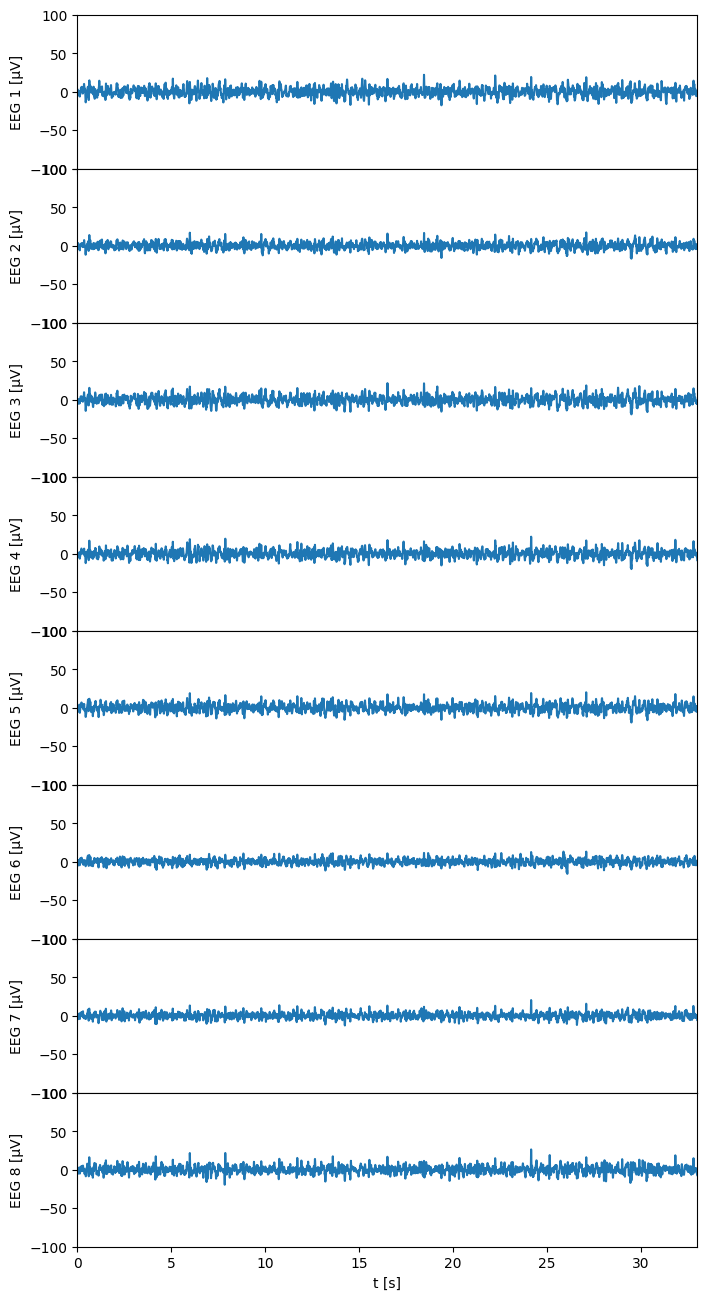

In [72]:
fig, axs = mp.subplots(numberOfEegChannels, 1, sharex=True, figsize=(8, 2*numberOfEegChannels), )
fig.subplots_adjust(hspace=0)
for i in range(numberOfEegChannels):
    axs[i].plot(t, eegfilt[:, i])
    axs[i].set_ylabel(f'EEG {i+1} [µV]')
    axs[i].set_ylim(-100, 100)
    axs[i].set_xlim(0, t[t.shape[0]-1])

axs[numberOfEegChannels - 1].set_xlabel('t [s]')
mp.show()